In [1]:
!pip install comet_ml

     |████████████████████████████████| 163kB 4.6MB/s 
     |████████████████████████████████| 204kB 49.3MB/s 
     |████████████████████████████████| 389kB 46.0MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=cdde59883d84a9a4fb2df1d428a5481749b342dcda47fcde76a66534cd1b3553
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [2]:
import pandas as pd
import numpy as np 
from comet_ml import Experiment
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
import cv2
np.random.seed(20)
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing import image
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D, Input
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
from keras.applications.nasnet import NASNetMobile
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras import layers, models


Using TensorFlow backend.


In [0]:
#this function returns the CNN model
def get_CNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, kernel_size=3, activation='linear', padding='same', input_shape=(128, 128, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  # model.add(layers.Dropout(0.5))
  model.add(layers.MaxPool2D(2))

  model.add(layers.Conv2D(128, kernel_size=3, activation='linear', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(2))

  model.add(layers.Conv2D(256, kernel_size=3, activation='linear', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.Conv2D(256, kernel_size=3, activation='linear', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(2))

  model.add(layers.Conv2D(512, kernel_size=3, activation='linear', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(2))

  model.add(layers.Conv2D(512, kernel_size=3, activation='linear', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())
  model.add(layers.MaxPool2D(2))


  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(10, activation='softmax'))
  return model






58892288/58889256 [==============================] - 1s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________

In [0]:
#This model returns out VGG based model
def get_VGG():

  input_shape = (128, 128, 1)
  img_input = Input(shape=input_shape, name = 'grayscale_input_layer')
  y = Conv2D(3, (3,3),  padding= 'same', name = 'grayscale_RGB_layer')(img_input)

  vgg_conv = VGG16(input_shape=(128, 128, 3), include_top=False, pooling="max")

  y = vgg_conv(y)

  y = Dense(512, activation='relu')(y) 
  y = Dense(256, activation='relu')(y) 
  y = Dense(128, activation='relu')(y) 


  y = Dense(10, activation="softmax")(y)
  model = Model(img_input, y)
  return model

In [5]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = '/content/drive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#change the paths according to your local files
PATH = BASE_PATH + 'miniproject3/'
MODEL_PATH = PATH + 'models/'
DATA_PATH = PATH + 'modified-mnist/'

train_images = pd.read_pickle(DATA_PATH + 'train_max_x')
test_images = pd.read_pickle(DATA_PATH + 'test_max_x')
x_test = test_images/255

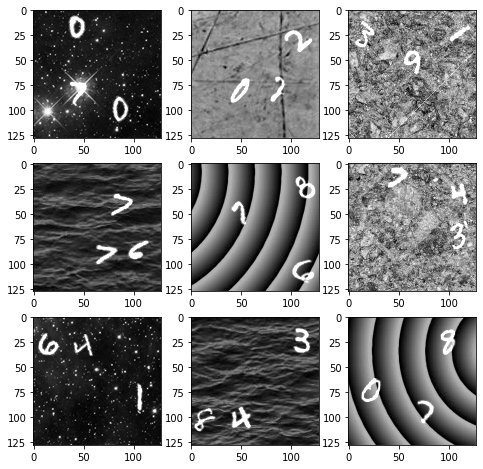

In [7]:
#visualizing  sample of training images
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_images[i], cmap='gray')
plt.savefig(PATH + 'mmnist-example-5.png')
plt.show()

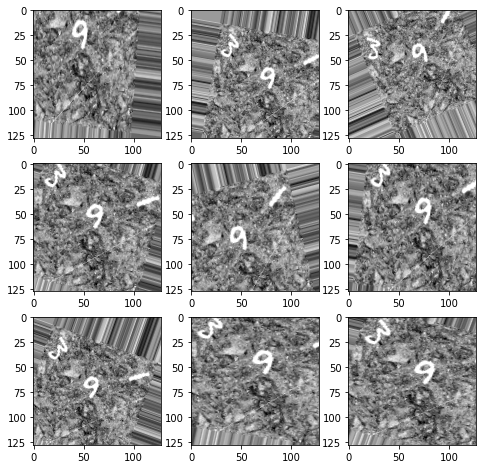

In [8]:
#Image Augmentation
train_datagen = ImageDataGenerator(
rescale=1./255,    
rotation_range=30,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=False,
fill_mode='nearest') 

val_datagen = ImageDataGenerator(rescale=1./255)

x = train_images[3]
x = np.expand_dims(x, axis=-1)
x= np.expand_dims(x, axis=0)
i = 1


fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3

for batch in train_datagen.flow(x, batch_size=32):
    # plt.figure(i)
    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image.array_to_img(batch[0]), cmap='gray')
    i += 1
    if i % (rows*columns + 1) == 0:
        break
plt.savefig(PATH + 'mmnist-aug-example.png')
plt.show()

In [0]:
train = pd.read_csv(DATA_PATH + 'train_max_y.csv')

y = np.array(train.drop(['Id'],axis=1))
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(train_images, y, random_state=42, test_size=0.2)

In [0]:
all_labels = pd.DataFrame(np.argmax(y, axis=1), columns=['Label'])

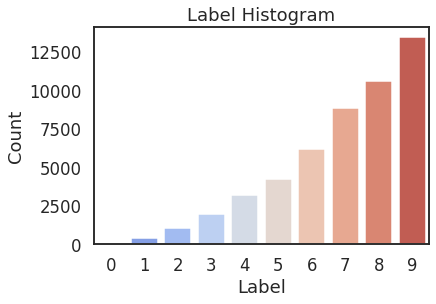

In [11]:
#visualizing the histogram of labels
import seaborn as sns
sns.set(style="white", context="talk")

sns.countplot(x='Label', data=all_labels, palette='coolwarm')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Histogram')
plt.savefig(PATH + 'label-histogram-trying.png')

In [0]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

train_datagen.fit(X_train)
val_datagen.fit(X_val)

In [0]:

experiment = Experiment(api_key="y7W3nBB2KpTXelJAzRFwK0mqn",
                        project_name="miniproject3", workspace="aarashfeizi")


COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/aarashfeizi/miniproject3/ab733c171f4e4eceb7cdbd5c4824fc3d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     acc [159]                      : (0.52105, 0.926875)
COMET INFO:     batch_acc [159289]             : (0.0, 1.0)
COMET INFO:     batch_loss [159289]            : (1.1920930376163597e-07, 4.639848709106445)
COMET INFO:     epoch_duration [159]           : (233.94315775699943, 245.03511956099965)
COMET INFO:     loss [159]                     : (0.20825845224505465, 1.3394413254740125)
COMET INFO:     step                           : 1987500
COMET INFO:     sys.cpu.percent.01 [558]       : (0.5, 38.1)
COMET INFO:     sys.cpu.percent.02 [558]       : (0.5, 39.7)
COMET INFO:     sys.cpu.percent.03 [558]       : (0.5, 37.3)
COMET INFO:     sys.cpu.percent.04 [558]       : (0.5, 37.5)
COMET INFO:     sys.cpu.percent.avg [558]      : (0.

In [14]:
model_type = 'VGG'

if model_type == 'CNN':
  model = get_CNN()
elif model_type == 'VGG':
  model = get_VGG()
 
VERSION = model_type + '_V25_aug_more_moredense_'
# opt = 'sgd'
learning_rate = 1e-2
decay_rate = 0.0
momentum = 0.0
bs = 4

opt = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

VERSION += '_opt_' + 'sgd'
VERSION += '_bs_' + str(bs)
VERSION += '_lr_' + str(learning_rate)
VERSION += '_dr_' + str(decay_rate)
VERSION += '_m_' + str(momentum)

model.compile(loss="categorical_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

filepath= MODEL_PATH + VERSION + "_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.summary()



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
grayscale_input_layer (Input (None, 128, 128, 1)       0         
_________________________________________________________________
grayscale_RGB_layer (Conv2D) (None, 128, 128, 3)       30        
_________________________________________________________________
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                12

In [0]:
filepath

'/content/drive/My Drive/miniproject3/models/VGG_V25_aug_more_moredense_CONT_LESS_LR__opt_modSgd_bs_4_lr_1e-05_dr_1e-06_m_0.0_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5'

In [15]:
output_dim = nb_classes = 10 
nb_epoch =200

model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=bs), 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=bs), 
                    steps_per_epoch = len(X_train)/bs, 
                    epochs=nb_epoch,
                    callbacks=callbacks_list)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
  420/10000 [>.............................] - ETA: 5:34 - loss: 1.9311 - acc: 0.2476

KeyboardInterrupt: ignored

In [0]:
# load weights
model.load_weights(MODEL_PATH + "VGG/" + vgg_model_path_3)
# Compile model (required to make predictions)

# estimate accuracy on whole dataset using loaded weights
score = model.evaluate(val_datagen.flow(X_val, y_val), verbose=0) 
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored

In [0]:
x_test = np.expand_dims(x_test, axis=-1)
result = model.predict(x_test, batch_size=512)
y_pred = np.argmax(result, axis=1)


In [0]:
indices = [i for i in range(10000)]

In [0]:
rawdata= { 'Id': indices, 'Label': y_pred }
submission = pd.DataFrame(rawdata, columns = ['Id', 'Label'])
submission.to_csv(MODEL_PATH + 'submission.csv', index=False , header=True)

NameError: ignored